<a href="https://colab.research.google.com/github/biruk-tafese/MachineLearingIntern/blob/main/updatedDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier  # For classification
import seaborn as sns

In [ ]:
data = pd.read_csv('cpdata.csv')
data

In [ ]:
data.isnull().sum()

In [29]:
data.head(5)

,temperature,humidity,ph,rainfall,label
0,20.879744,82.002744,6.502985,202.935536,rice
1,21.770462,80.319644,7.038096,226.655537,rice
2,23.004459,82.320763,7.840207,263.964248,rice
3,26.491096,80.158363,6.980401,242.864034,rice
4,20.130175,81.604873,7.628473,262.717340,rice


In [6]:
X = data.drop('label',axis=1)
y= data['label']

In [106]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [107]:
# Create the Random Forest model
model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)  # Adjust hyperparameters as needed

# Train the model
model.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, n_estimators=50, random_state=42)

In [108]:
y_pred = model.predict(X_test)


In [109]:
y_pred

array(['Jute', 'orange', 'Black gram', 'Moth Beans', 'Peas',
       'Pigeon Peas', 'mango', 'Tobacco', 'Tea', 'Coconut', 'maize',
       'Mung Bean', 'Lentil', 'muskmelon', 'papaya', 'Cotton', 'banana',
       'Lentil', 'mango', 'Tobacco', 'orange', 'millet', 'Rubber',
       'Mung Bean', 'muskmelon', 'pomegranate', 'pomegranate', 'millet',
       'mango', 'maize', 'Black gram', 'Coconut', 'Pigeon Peas', 'Lentil',
       'Rubber', 'grapes', 'Kidney Beans', 'wheat', 'mango',
       'Kidney Beans', 'papaya', 'grapes', 'Tea', 'Tobacco',
       'Adzuki Beans', 'orange', 'Black gram', 'Pigeon Peas', 'apple',
       'orange', 'Ground Nut', 'Mung Bean', 'grapes', 'Pigeon Peas',
       'papaya', 'wheat', 'maize', 'wheat', 'Tobacco', 'millet',
       'Tobacco', 'Sugarcane', 'orange', 'apple', 'millet', 'Black gram',
       'orange', 'pomegranate', 'Mung Bean', 'watermelon', 'Kidney Beans',
       'Tobacco', 'Mung Bean', 'Jute', 'Mung Bean', 'grapes', 'mango',
       'orange', 'Tobacco', 'rice',

In [ ]:
np.mean(y_pred == y_test)

In [111]:
#evaluate model performance
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)


In [ ]:
print('accuracy:', accuracy)
print('report:', report)

In [113]:
from sklearn.preprocessing import MinMaxScaler
# Extract numerical columns for scaling
numerical_columns = ['temperature','humidity','ph','rainfall']

# Perform normalization
scaler_minmax = MinMaxScaler()
data[numerical_columns] = scaler_minmax.fit_transform(data[numerical_columns])

print("Normalized DataFrame:\n", data)

Normalized DataFrame:
       temperature  humidity        ph  rainfall       label
0        0.261131  0.800116  0.466264  0.484546        rice
1        0.280426  0.781404  0.549480  0.547446        rice
2        0.307159  0.803652  0.674219  0.646381        rice
3        0.382691  0.779611  0.540508  0.590428        rice
4        0.244892  0.795693  0.641291  0.643075        rice
...           ...       ...       ...       ...         ...
3095     0.356624  0.884987  0.507025  0.100969  watermelon
3096     0.385882  0.830053  0.417468  0.074550  watermelon
3097     0.357560  0.825715  0.528664  0.056539  watermelon
3098     0.391495  0.821125  0.460088  0.063008  watermelon
3099     0.393413  0.882509  0.428607  0.101663  watermelon

[3100 rows x 5 columns]


In [114]:
dependent_train, dependent_test, independent_train, independent_test = train_test_split(y, X, test_size=0.2, random_state=42)

In [115]:
y

0             rice
1             rice
2             rice
3             rice
4             rice
           ...    
3095    watermelon
3096    watermelon
3097    watermelon
3098    watermelon
3099    watermelon
Name: label, Length: 3100, dtype: object

In [ ]:
X

In [ ]:
dependent_train.shape


In [117]:
dependent_test.shape

(620,)

In [118]:
cor = data.corr()
cor

<ipython-input-118-e8715df75048>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = data.corr()


,temperature,humidity,ph,rainfall
temperature,1.000000,-0.076999,0.017024,-0.055143
humidity,-0.076999,1.000000,-0.002359,0.192074
ph,0.017024,-0.002359,1.000000,-0.288598
rainfall,-0.055143,0.192074,-0.288598,1.000000


<Axes: >

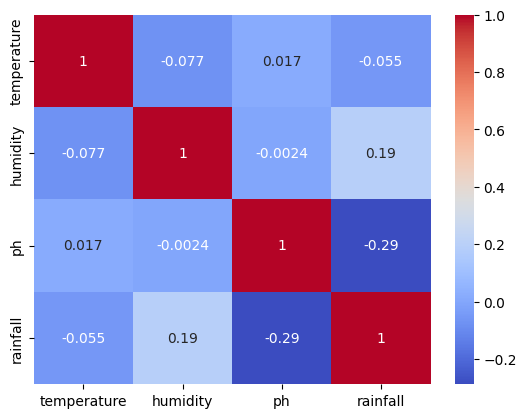

In [119]:
#import seaborn as sns
sns.heatmap(cor,annot=True,cbar=True, cmap='coolwarm')

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Label encode the categorical column
label_encoder = LabelEncoder()
categorical_encoded = label_encoder.fit_transform(y)

# One-hot encode the categorical data
onehot_encoder = OneHotEncoder()
categorical_encoded = categorical_encoded.reshape(-1, 1)
onehot_encoded = onehot_encoder.fit_transform(categorical_encoded).toarray()

# Combine the encoded categorical data with the numeric data
encoded_data = pd.concat([X, pd.DataFrame(onehot_encoded)], axis=1)

print(encoded_data)

In [86]:
#Hyperparameteric tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 5, 200],
    'max_depth': [None, 10, 20]
}

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_


In [121]:
best_model

RandomForestClassifier(n_estimators=50, random_state=42)

In [ ]:
# Create the Random Forest model
model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)  # Adjust hyperparameters as needed

# Train the model
model.fit(independent_train,dependent_train)


In [ ]:
y_pred = model.predict(X_test)
y_pred

In [105]:
np.mean(y_pred == dependent_test)*100

100.0

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score




In [96]:
# Convert column names to strings
encoded_data.columns = encoded_data.columns.astype(str)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(encoded_data, y, test_size=0.2, random_state=42)



In [ ]:
# Initialize the Random Forest classifier
model = RandomForestClassifier(n_estimators=50, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)


In [123]:
# Make predictions on the test data
y_pred = model.predict(X_test)



In [ ]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [ ]:
np.mean(y_pred == dependent_test)*100